<h1 align="center" style="color:blue;">A US Mortality Case Study</h1>
<br>



## Introduction

This study is to analyze mortality in the US based on causes and age groups. This study aims to answer some of questions such as what the top causes and diseases that have killed American for the past 2 decades are, how death rates of those causes have changed overtime, how those cuases differ geographically across the US, and how the number of deaths of each US state differ compared to its population.

There are 3 datasets used in this study and imported into the database.

This study will be conducted on MongoDB databases, and Python programming will be utilized for analysis and visualization.

## Data Sources

- To locate data sources which best address our research goals, we utilized Google Dataset Search, and Kaggle.

**Our candidate data is sourced from the following organizations:**


- **US Centers for Disease Control and Prevention**

<img src="https://1liuru2uhjhf436ctb3agt3q-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/cdc-logo-2-600x338.jpg" style="height:40px">

- **US Department of Health and Human Services**

<img src="https://d1yjjnpx0p53s8.cloudfront.net/styles/logo-thumbnail/s3/072011/depthealthhumanservices_usa-converted.png?itok=FXrpXqli" style="height:40px">

- **Federal Reserve Bank of St. Louis**

<img src="https://mansionhouse.com/wp-content/uploads/2018/10/federal-reserve-bank-of-st-louis-logo-eagle-shield-336.jpg" style="height:40px">


## Dataset Information

**1. Leading Causes of Death -  US CDC National Center for Health Statistics**
  - This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999
  
**2. Deaths in 122 US Cities (1962 - 2016) - Cities Mortaility Reporting System**
  - This dataset contains the complete set of data reported by 122 cities to the City Mortality Reporting System
  - *Note*: This system was retired as of 10/6/2016

**3. State Population (from 1950 - 2017)**
  - This dataset provides population in each state from 1950 - 2017.


### 1. Leading Causes of Death - US CDC National Center for Health Statistics

- **Data Source**
    - National Center for Health Statistics; Centers for Disease Control and Prevention; US Department of Health and Human Services
    - [Link](https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu)

- **Extended Description**
  - This dataset presents the age-addjusted death rates for the 10 leading causes of death in the United States beginning in 1999 to 2016.
  - Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population.

- **Format**
  - `csv`, Comma-Separated Values File
  
- **Size**
    - (10297, 6 )


- **Data Dictionary**

|Dataset Column Name|Description|Type|
|:------------------------------------|:----------------|:------:|
|`Year`|Year of the observation|`Number`|
|`113 Cause Name`|ICD-10 113 cause code|`Number`|
|`Cause Name`|Plain text cause name|`String`|
|`State`|State of the observation|`String`|
|`Deaths`|Number of deaths for the observation|`Number`|
|`Age-adjusted Death Rate`|Age-adjusted death rate of this cause|`Number`|

### 2. Deaths in 122 US Cities (1962 - 2016) - Cities Mortality Reporting System

- **Data Source**
    - Morbidity and Mortality Weekly Report; Centers for Disease Control and Prevention; US Department of Health and Human Services
    - [Link](https://catalog.data.gov/dataset/deaths-in-122-u-s-cities-1962-2016-122-cities-mortality-reporting-system)

- **Extended Description**
  - This file contains the complete set of data reported to 122 Cities Mortality Reposting System.
  - The system was retired as of 10/6/2016
  - While the system was running each week, the vital statistics offices of 122 cities across the United States reported the total number of death certificates processed and the number of those for which pneumonia or influenza was listed as the underlying or contributing cause of death by age group.

- **Format**
  - `csv`, Comma-Separated Values File
  
- **Size**
    - (346343, 13)

- **Data Dictionary**

|Dataset Column Name|Description|Type|
|:------------------------------------|:----------------|:------:|
|`Year`|Year of the observation|`Number`|
|`Week`|Week of the observation (range: 1-52)|`Number`|
|`Week Ending`|Last day of the week of observation|`Date`|
|`Region`|CDC Region Code|`Number`|
|`State`|State of the observation|`String`|
|`City`|City of the observation|`String`|
|`Pneumonia and Influenza Deaths`|Number of deaths caused by Pneumonia or Influenza|`Number`|
|`All Deaths`|Total death count of the observation|`Number`|
|`<1 year (all cause deaths)`|Number of deaths <1|`Number`|
|`1-24 years (all cause deaths)`|Number of deaths (1-24 years)|`Number`|
|`25-44 years (all cause deaths)`|Number of deaths (25-44 years)|`Number`|
|`45-64 years (all cause deaths)`|Number of deaths (45-64 years)|`Number`|
|`65+ years (all cause deaths)`|Number of deaths (65+ years)|`Number`|

### 3. State Population.

- **Data Source**
    - Federal Reserve Bank of St. Louis
    - [Link](https://fred.stlouisfed.org/release?rid=118&t=state&ob=pv&od=desc)

- **Extended Description**
  - There are 50 states of the US with thier populations.
  - It is used for the general analysis of number of deaths over population.

- **Format**
  - `csv`, Comma-Separated Values File
  
- **Size**
    - (3469, 4)

- **Data Dictionary**

|Dataset Column Name|Description|Type|
|:------------------------------------|:----------------|:------:|
|`State`|State Name|`String`|
|`Postal Code`| Abbreviation|`String`|
|`Year`| Year of Record|`Number`|
|`Population`| Number of population in each state|`Number`|

## Entity Relationship (ER) Model Diagram

![title](Chart/Updated%20ER%20Model%20Diagram.png)


## Implementation Challenges

- Build data ingestion pipeline

- ICD-10 113 Selected Causes of Death Dataset Issues
  - Currently in PDF
  - Decided to Omit
  
- Added additional data; specifically, Population data from the St. Louis Fed

## Data Analytics Overview

- Longitudinal analysis of the causes of morbidity in the United States
- Temporal analysis of changing patterns over time in the United States
- Categorical analysis of primary causes of death
- Geographical analysis of differing patterns in causes of Death

## Data Import

**There are 3 datasets imported to the database including**
- **CSV file named leading_cuases. Below command used in MongoDB command shell.**
```
mongoimport --db fe512db --collection LeadingCauses --type csv --parseGrace skipRow --columnsHaveTypes --fields "year.int32(),cause_code.string(),cause_name.string(),state.string(),death.int32(),age_adjusted_death_rate.double()" --file dataset/leading_causes.csv --ignoreBlanks
```

- **CSV file named death_in_122UScities.csv was imported usd below command.**
```
mongoimport --db fe512db --collection deathInUsCities --type csv --headerline --file dataset/death_in_122UScities.csv
```

- **CSV file named statepops was imported used below command.**
```
mongoimport --db fe512db --collection statepops --type csv --headerline --file dataset/statepops.csv
```



### Checking cellections after importing data.

In [2]:
use fe512db

switched to db fe512db

In [13]:
show collections

LeadingCauses
deathInUsCities
statepops

## Categorical Analysis of Causes of Death (What are the top causes of death?)


- Used aggreagate to create pipeline to query data from LeadingCauses collection and save the data to a new collection named totalnumofdeath.
- PyMongo is used to query data from databases and make visualization.


In [14]:
db.LeadingCauses.aggregate(
    [
        { $group: { _id: "$cause_name", number_of_death: { $sum : "$death"}} },  
        { $sort: { number_of_death: -1 }},
        { $skip: 1},
        { $out: "totalnumOfdeath"}
    ])

In [1]:
from pymongo import MongoClient

FIELDS = {'_id': True, 'number_of_death':True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["totalnumOfdeath"]
numofdeath = collection.find(projection=FIELDS)
numofdeath = list(numofdeath)

In [3]:
import pandas as pd

numofdeath_df = pd.DataFrame(numofdeath)
numofdeath_df.columns = ['cause', 'number of death']

Text(0.5, 1.0, 'total number of death from 1999 to 2016')

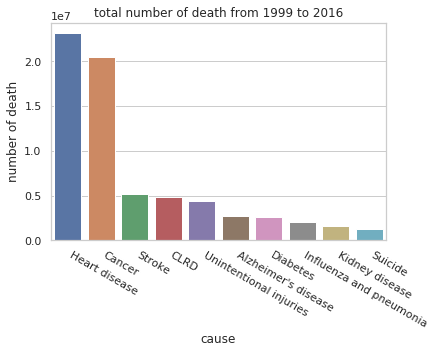

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.barplot(x="cause", y="number of death", data=numofdeath_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha = 'left')
plt.title("total number of death from 1999 to 2016")

## Chart Analysis

- Graph shows total number of death of each cause from 1999 to 2016.
- **Heart Disease** and **Cancer** dominate the *Causes of Death* list


## Heart Disease Variation by Location (How do death rates of heart disease differ across the US?)

- Used aggregation to create pipeline and saved to a new collection named heartDisease.
- Export the heartDisease collection to a csv file.
- Use Excel Map insertion function to generate a geographical visualization.

In [15]:
db.LeadingCauses.aggregate(
    [    
        { $match: { cause_name:"Heart disease"}},
        { $group: { _id: "$state", "Age adjusted death rate": { $avg: "$age_adjusted_death_rate"}}},
        { $sort : { "Age adjusted death rate": -1}},
        { $skip : 1},
        { $out : "heartDisease"}
    ])

### heartDisease collection is exported to csv for geographical visualization.

**below command was used to export the collection.**
```
mongoexport --db fe512db --collection heartDisease --type csv --fields _id,'Age adjusted death rate' --out heartdisease.csv
```


## Using Excel to visualize


![title](Chart/Heart%20disease.jpg)

### Chart Analysis

- bolder color represents higher death rate.
- Interestingly, many states with high death rate of heart disease are on the east side of the US.
- Oklahoma has the highest death rate of heart disease.

## Cancer Variation by Location (How do death rate of cancer differ across the US?)

- Used aggregation to create pipeline and saved to a new collection named cancer.
- Export the cancer collection to a csv file.
- Use Excel Map insertion function to generate a geographical visualization.

In [16]:
db.LeadingCauses.aggregate(
    [    
        { $match: { cause_name:"Cancer"}},
        { $group: { _id: "$state", "Age adjusted death rate": { $avg: "$age_adjusted_death_rate"}}},
        { $sort : { "Age adjusted death rate": -1}},
        { $skip : 1},
        { $out : "cancer"}
    ])

### Cancer collection is exported to csv format for geographical visualization.

**below command was used to export the collection.**

```
mongoexport --db fe512db --collection cancer --type csv --fields _id,'Age adjusted death rate' --out cancer.csv
```


## Using Excel to visualize

![title](Chart/age%20adjust%20of%20cancer.jpg)

### Chart Analysis

- Missisippi has the highest death rate of cancer.
- Many states in lower east side of the US have high death rate of cancer.

## Cancer and Heart Discease Age Adjusted Death Rate Changes over Time
## (How death rate of cancer and heart disease change over time?)

- Used aggregation to create pipeline and saved to a new collection named CancerandHeart.
- Export the CancerandHeart collection to a csv file.
- Used Pymongo to query and visualize.


In [17]:
db.LeadingCauses.aggregate(
    [    
        { $match: { $or : [ {cause_name: "Cancer" } , {cause_name: "Heart disease" }] }},
        { $match: { "state" : "United States"}},
        { $project: {
                Year: "$year",
                "cause name": "$cause_name",
                "Age adjusted death rate": "$age_adjusted_death_rate",
                _id : 0
                }},
        { $sort : { Year: 1}},
        { $out : "CancerandHeart"}
    
    ])

In [6]:
from pymongo import MongoClient

FIELDS = {'Year': True, "cause name":True, "Age adjusted death rate":True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["CancerandHeart"]
ageadejusted = collection.find(projection=FIELDS)
ageadejusted = list(ageadejusted)

In [7]:
import pandas as pd

ageadejusted_df = pd.DataFrame(ageadejusted)
ageadejusted_df = ageadejusted_df.drop(columns=['_id'])
ageadejusted_df= ageadejusted_df.set_index('Year')

Text(0.5, 1.0, 'Age Adjusted Death Rate From 1999 to 2016')

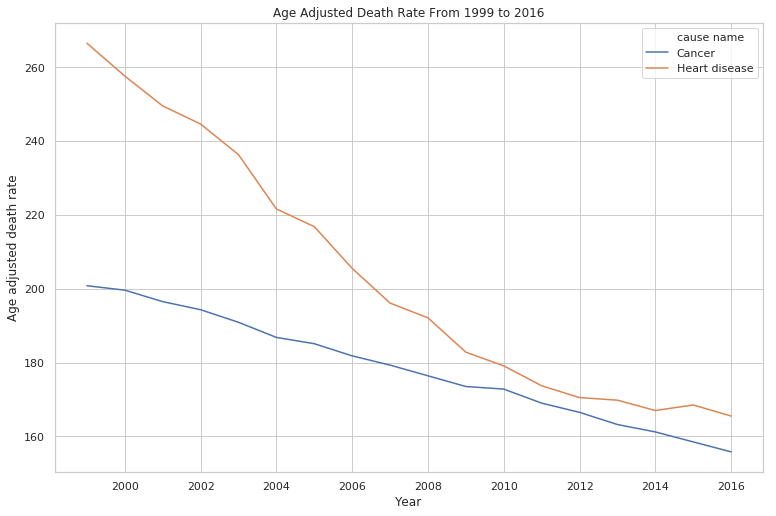

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
ax = sns.lineplot(x=ageadejusted_df.index, y="Age adjusted death rate",
             hue="cause name",
             data=ageadejusted_df)
ax.xaxis.set_major_locator(MaxNLoctator(integer=True))
plt.title("Age Adjusted Death Rate From 1999 to 2016")

## Chart Analysis

- Cancer and Heart disease are focused as they have dominated other causes of death.
- Cancer and Heart disease have declined overtime possibly because of the technology advancement.

- Heart disease had high death rate in 1999 and declined rapidly in the last decade.

## Generalized Location Mortality Analysis
## (Which states have the most number of death caused by all causes?)

- Conducted a broad state-level analysis of different death rates
- Compared total deaths to total populations of different states
- Created compelling visualization using MongoDB to represent the wide variations in the data

In [19]:
db.LeadingCauses.aggregate(
    [    
        { $match: { cause_name:"All causes"}},
        { $group: { _id: "$state", death: { $avg: "$death"}}},
        { $sort : { death: -1}},
        { $skip : 1},
        { $out : "avgDeathbyState"}
    ])

In [27]:
db.statepops.aggregate([
    { $match: { Year: { $gt: 1998}}},
    { $group: {
                _id: "$state",
                population: { $avg :{$multiply: ["$population" , 1000000]}},
                }
    },
    { $sort : { population : -1}},
    { $out : "popperstate"}
])

In [2]:
from pymongo import MongoClient

FIELDS = {'_id': True, 'death':True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["avgDeathbyState"]
avgDeath = collection.find(projection=FIELDS)
avgDeath = list(avgDeath)


In [3]:
FIELDS = {'_id': True, "population":True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["popperstate"]
PopPerState = collection.find(projection=FIELDS)
PopPerState = list(PopPerState)

In [5]:
import pandas as pd

avgDeath_df = pd.DataFrame(avgDeath)
avgDeath_df.columns = ['state', 'number of death']

PopPerState_df = pd.DataFrame(PopPerState)
PopPerState_df.columns = ['state', 'Population']


Text(0.5, 1.0, 'Average Population by state from 1999 to 2016')

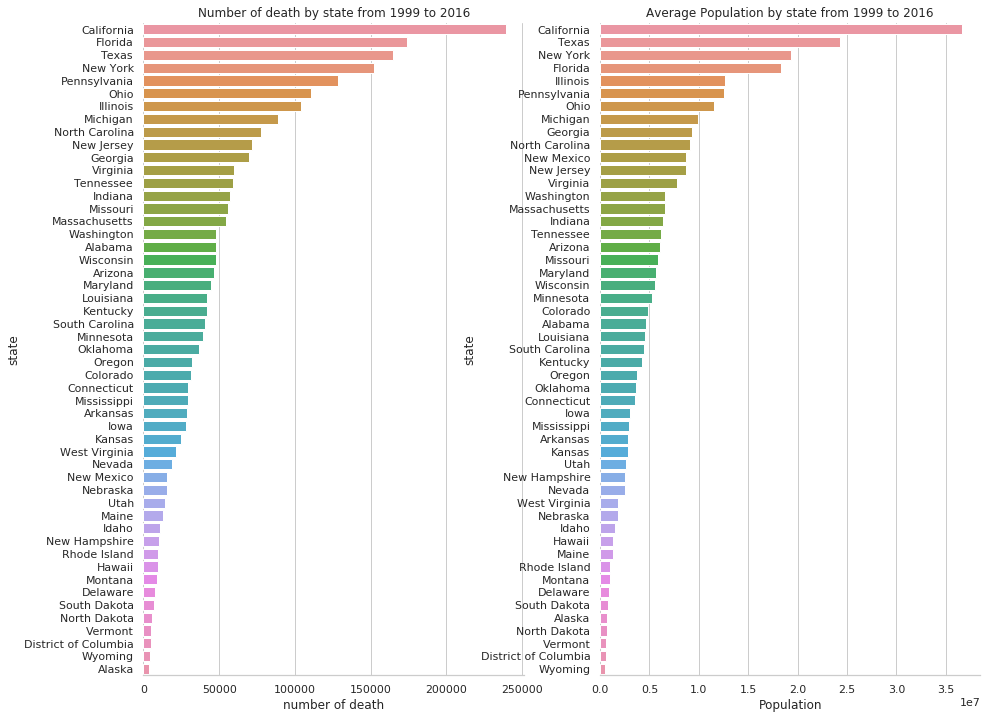

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 12))
sns.despine(left=True)

sns.barplot(x='number of death', y="state", data=avgDeath_df, ax=axes[0])\
.set_title("Number of death by state from 1999 to 2016")

sns.barplot(x="Population", y='state', data=PopPerState_df, ax=axes[1])\
.set_title("Average Population by state from 1999 to 2016")


## Chart Analysis

- California has the greatest number of death rate cuased by all causes; however, it has the highest average number of population.

- Florida has the second largest number of death rate, but it is in the 4th rank in population number. it implies that florida has high number of death rate per capita.

## Age of Death Analysis

## (How does number of death of each age group change over time?)

In [20]:
db.deathInUsCities.aggregate([
    { $match: { Year: {$gt: 1998}}},
    { $group: { 
                _id: "$Year", 
                "<1 year (all cause deaths)": { $sum: "$<1 year (all cause deaths)"},
                "1-24 years (all cause deaths)": { $sum: "$1-24 years (all cause deaths)"},
                "25-44 years": { $sum: "$25-44 years"},
                "45-64 years (all cause deaths)": { $sum: "$45-64 years (all cause deaths)"},
                "65+ years (all cause deaths)": { $sum: "$65+ years (all cause deaths)"}
            }
    },
    { $sort: { _id: 1}},
    { $out: "DeathbyAgeGroup"}
])

In [1]:
from pymongo import MongoClient

FIELDS = {'_id': True, "<1 year (all cause deaths)":True, 
         "1-24 years (all cause deaths)":True, "25-44 years":True, 
         "45-64 years (all cause deaths)":True, "65+ years (all cause deaths)":True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["DeathbyAgeGroup"]
DeathbyAgeGroup = collection.find(projection=FIELDS)
DeathbyAgeGroup = list(DeathbyAgeGroup)

In [2]:
import pandas as pd

DeathbyAgeGroup_df = pd.DataFrame(DeathbyAgeGroup)
DeathbyAgeGroup_df.columns = ['1-24 years', "25-44 years", "45-64 years","65+ years",'<1 year','Year']
DeathbyAgeGroup_df= DeathbyAgeGroup_df.set_index('Year')

Text(0.5, 1.0, 'Number of death per year by age group from 1999 to 2016')

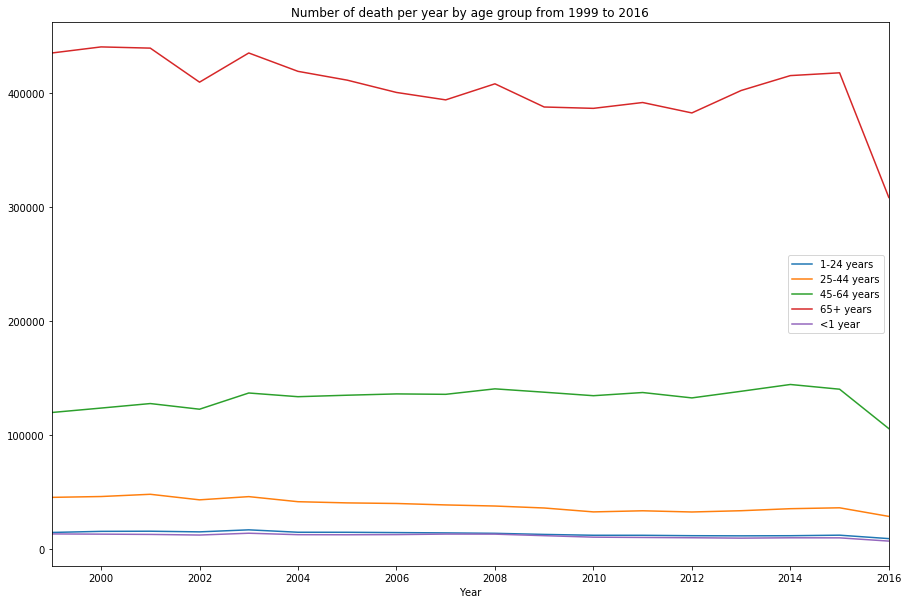

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

DeathbyAgeGroup_df.plot.line(figsize=(15,10))
plt.title("Number of death per year by age group from 1999 to 2016")

## Chart Analysis
- Not surprisinglly, more-than-65-year-old people died with the greatest number.
- There is a decrease in number of death in all age groups over time.

## Top number of death of elderly by states 

## (Which states have the highest average number of death of elderly?)

In [40]:
db.deathInUsCities.aggregate([
    { $match: { Year: {$gt: 1998}}},
    { $group: { 
                _id: { Year : "$Year", State: "$State"},
                "65+ years (all cause deaths)": { $sum: "$65+ years (all cause deaths)"}
            }
    },
    { $group: {
                _id: "$_id.State" ,
                "65+ years (all cause deaths)": { $avg: "$65+ years (all cause deaths)"}
    }},
    { $sort: { "65+ years (all cause deaths)": -1}},
    { $limit : 5},
    { $out : "ElderyDeathbycities"}
])

In [1]:
from pymongo import MongoClient

FIELDS = {'_id': True, "65+ years (all cause deaths)":True}

connection = MongoClient('localhost', 27017)
collection = connection["fe512db"]["ElderyDeathbycities"]
elderlyDeath = collection.find(projection=FIELDS)
elderlyDeath = list(elderlyDeath)

In [37]:
import pandas as pd

elderlyDeath_df = pd.DataFrame(elderlyDeath)
elderlyDeath_df = elderlyDeath_df[elderlyDeath_df.columns[::-1]]
elderlyDeath_df.columns = ['state', 'Average Number of Death']
elderlyDeath_df = elderlyDeath_df.set_index('state')

Text(0.5, 1.0, 'Average Number of Death of Elderly by cities')

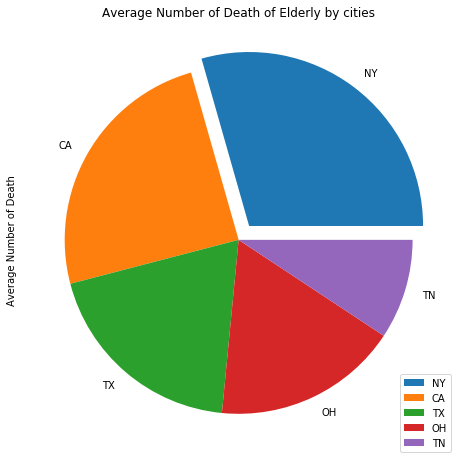

In [48]:
import matplotlib.pyplot as plt


explode = (0.1,0,0,0,0)

elderlyDeath_df.plot.pie(subplots = True, figsize = (10,8), explode = explode)
plt.title('Average Number of Death of Elderly by cities')


## Chart Analysis

- This chart shows the top 5 states with the highest number of death of elderly.
- New York has the highest average number of death of people with the age above 65 year old.

## Conclusions

- We're getting better!

- There is still large geographic disparity between the reduction in Death Rates

- Cancer and Heart Disease fatalities have significantly reduced over the last decade.

## Future Work
    
- Overlay economic data to better gauge effect of wealth on mortality metrics.
- Create interactive charts with live updating data.
- Build automated ETL stack to enable the quick loading of new data to the system.

<h1 align="center">Thank you!</h1>
